In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

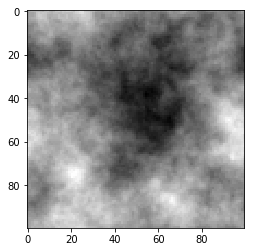

In [2]:
DATADIR = "C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/100px/Testing/features"

for img in os.listdir(DATADIR):
    img_array = np.loadtxt(os.path.join(DATADIR,img))
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break

In [3]:
print(img_array)

[[ 161.  171.  176. ...,  141.  158.  157.]
 [ 151.  164.  162. ...,  140.  150.  144.]
 [ 151.  163.  162. ...,  127.  133.  140.]
 ..., 
 [ 156.  164.  173. ...,  166.  162.  158.]
 [ 149.  166.  173. ...,  162.  164.  151.]
 [ 154.  166.  180. ...,  151.  166.  161.]]


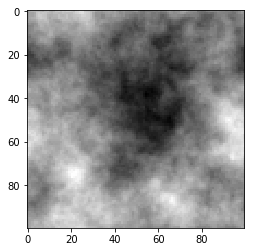

In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
labels = np.loadtxt("C:/Users/C1764397/Workshop/PhD/Data/fBmFields/2DUnexponentiated/100px/Testing/labels/labels.txt")
print(labels)

[  6.80344627e-01   1.58114214e-01   8.41097028e-01   4.09529278e-01
   5.21588230e-01   2.56941692e-01   6.56326548e-01   2.71630346e-01
   9.53005117e-01   6.61841571e-01   1.61367867e-02   6.90220196e-01
   6.02048334e-01   5.28024767e-01   3.12830705e-01   7.23562440e-01
   6.27880545e-01   9.38007138e-02   3.42392341e-01   9.55836607e-01
   5.41050691e-01   7.01591891e-01   4.67352643e-01   6.90506643e-01
   6.47944236e-01   2.59566843e-01   1.06419910e-01   4.42795950e-01
   7.88800436e-01   8.76009281e-01   4.75109765e-01   5.01637345e-02
   3.13450891e-01   5.86033490e-01   1.55351513e-01   8.00773069e-01
   3.95519110e-02   3.60172580e-01   3.00189688e-03   4.34213271e-01
   3.61347965e-01   9.25682576e-01   7.90702640e-01   6.52464797e-01
   2.45273870e-02   4.08616527e-01   4.35380833e-01   2.10669999e-01
   5.88097226e-01   8.93316710e-01   9.18087952e-02   4.58380451e-01
   9.83452547e-01   1.57926986e-01   3.84204257e-01   9.64180903e-01
   3.77426756e-01   4.90786539e-01

   4.03319577e-01   2.26067384e-01   8.10386912e-01   9.87624697e-01]


In [6]:
training_data = []

def create_training_data():
    c=0
    for img in tqdm(os.listdir(DATADIR)):
        try:
            img_array = np.loadtxt(os.path.join(DATADIR,img))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,labels[c]])
            c+=1
        except Exception as e:
            pass

create_training_data()
print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.73it/s]


1000


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0.0955248853938
0.303379098358
0.0384861532608
0.53924665891
0.237030297612
0.830065325006
0.888726529894
0.230473762631
0.429552652198
0.431833988486


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0])    
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[ 119.  138.  120. ...,   99.  141.  169.]
 [ 114.   86.   91. ...,  107.  127.   99.]
 [ 106.  122.  133. ...,   97.  122.  110.]
 ..., 
 [ 100.  120.  108. ...,  143.  131.   98.]
 [ 109.  116.  126. ...,  127.  120.  104.]
 [ 148.  129.  122. ...,  111.  117.  155.]]
[[[[ 119.]
   [ 138.]
   [ 120.]
   ..., 
   [  99.]
   [ 141.]
   [ 169.]]

  [[ 114.]
   [  86.]
   [  91.]
   ..., 
   [ 107.]
   [ 127.]
   [  99.]]

  [[ 106.]
   [ 122.]
   [ 133.]
   ..., 
   [  97.]
   [ 122.]
   [ 110.]]

  ..., 
  [[ 100.]
   [ 120.]
   [ 108.]
   ..., 
   [ 143.]
   [ 131.]
   [  98.]]

  [[ 109.]
   [ 116.]
   [ 126.]
   ..., 
   [ 127.]
   [ 120.]
   [ 104.]]

  [[ 148.]
   [ 129.]
   [ 122.]
   ..., 
   [ 111.]
   [ 117.]
   [ 155.]]]]


In [10]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()